# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neural networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [1]:
# !pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

#tensorflow_version only works in colab
# %tensorflow_version 1.x

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('1')

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

## Import Modelzoo

In [2]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [3]:
print("")
print("Model".ljust(27), " ", "Dataset")
print("")
for name, Model in nets.models_map.items():
    print(name.ljust(27), " ", Model.dataset)


Model                         Dataset

AlexNet                       ImageNet
AlexNet_caffe_Places365       Places365
CaffeNet_caffe                ImageNet
InceptionResnetV2_slim        ImageNet
InceptionV1                   ImageNet
InceptionV1_caffe             ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_caffe_Places365   Places365
InceptionV1_slim              ImageNet
InceptionV2_slim              ImageNet
InceptionV3_slim              ImageNet
InceptionV4_slim              ImageNet
MobilenetV1_025_slim          ImageNet
MobilenetV1_050_slim          ImageNet
MobilenetV1_slim              ImageNet
MobilenetV2_10_slim           ImageNet
MobilenetV2_14_slim           ImageNet
NasnetLarge_slim              ImageNet
NasnetMobile_slim             ImageNet
PnasnetLarge_slim             ImageNet
PnasnetMobile_slim            ImageNet
ResnetV1_101_slim             ImageNet
ResnetV1_152_slim             ImageNet
ResnetV1_50_slim              ImageNet
ResnetV2_101_slim    

## List Model Layers

In [4]:
models.InceptionV4_slim.layers

(Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_1a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_2a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_2b_3x3/Relu: 64> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_3a/concat: 160> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_4a/concat: 192> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5a/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5b/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5c/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5d/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5e/concat: 384> ([{'conv

## Show Model Graph

In [5]:
model = models.InceptionV4_slim()

model.show_graph()

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


512 15.12645



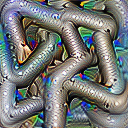

In [6]:
model = models.InceptionV4_slim()

_ = render.render_vis(model, "InceptionV4/InceptionV4/Mixed_6b/concat:0")

## Caricature

See the [inversion and caricature notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/misc/feature_inversion_caricatures.ipynb) to learn more.


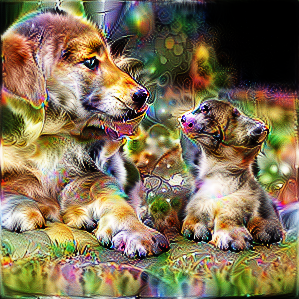


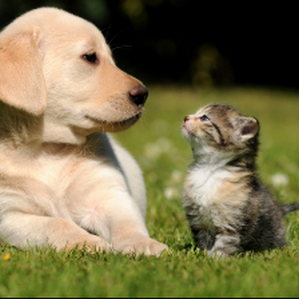
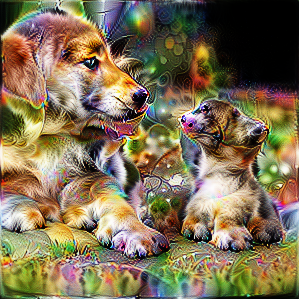

In [7]:
from lucid.recipes.caricature import feature_inversion

img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")

model = models.InceptionV4_slim()

result = feature_inversion(img, model, "InceptionV4/InceptionV4/Mixed_6b/concat", n_steps=512, cossim_pow=0.0)
show(result)